In [65]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Filter data as Spiga et al. did
from scipy.signal import savgol_filter, butter, sosfilt

# pressure_filter = savgol_filter(sol_data['PRESSURE'], window_length, 0, mode='nearest')

[  1. 100.]
2500 100.0 201


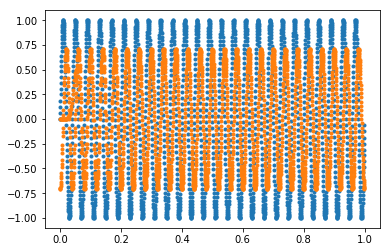

In [76]:
num_periods = 2
min_period = 1.
max_period = 100.
amp = 1.
sampling = 4*min_period
max_num_periods = 100.
max_time = max_num_periods*max_period

periods = np.round(10**(np.linspace(np.log10(min_period), np.log10(max_period), num_periods)))
print(periods)
time = np.linspace(0., max_time, int(max_time/sampling))
signal = np.zeros_like(time)

# for i in range(len(periods)):
for i in [1]:
    signal += amp*np.sin(2.*np.pi/periods[i]*time)
    
plt.plot(time % min_period, signal, marker='.', ls='')

# Suppress low-frequency signal
order = 10
freq_lim = 1./max_period
sos = butter(order, freq_lim, 'lp', fs=1/(time[1] - time[0]), output='sos')
filtered = sosfilt(sos, signal)
plt.plot(time % min_period, filtered, marker='.', ls='')

# window_length = sampling/min_period + 1
window_length = 2*int(np.max(time)/np.max(periods)) + 1
print(len(time), max_num_periods, window_length)
# filt = savgol_filter(signal, window_length, 0)
# plt.plot(time, filt)

# plt.plot(time, signal - filt)

/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


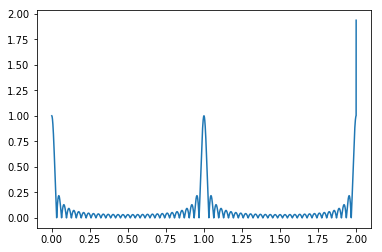

In [81]:
M = 31
f = np.linspace(0, 2, 10000)
H = np.abs(np.sin(np.pi*f*M)/(M*np.sin(np.pi*f)))

plt.plot(f, H)